In [52]:
ors = 4

In [53]:
import sys
sys.path.append('../_amigocloud')
import simplekml
from amigocloud import AmigoCloud
import pandas as pd
from shapely import wkb
import geopandas as gpd
from shapely.geometry import Point, Polygon, MultiPolygon, MultiPoint
import os

In [54]:
# RUTA ONEDRIVE
ruta_data = r'C:\Documents'
# ruta de carpera donde estan las llaves
ruta = open('../ruta.txt')
ruta = ruta.readlines()[0]
# leer token
acceso = open(ruta + '/_keys/api_amigocloud.key','r')
api_token = acceso.readlines()[0]
acceso.close()
amigocloud = AmigoCloud(token=api_token)
amigocloud

# leer los dos shps de siembra y puntos de planificacion
path_cat = ruta_data + r'\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Pulverizacion\2025\SHP\catastro_S09_MIERCOLES.shp'
path_puntos = ruta_data + r'\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Pulverizacion\2025\SHP\PUNTOS_PLAN.shp'
path_plan = ruta_data + r'\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Pulverizacion\2025\SHP\PLANIFICACION.shp'
path_xlsx_parte = ruta_data + r'\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Pulverizacion\2025\parte_diario_pulverizacion.xlsx'

# ACTUALIZAR SHP PLANIFICACION

In [56]:
gdf_puntos = gpd.read_file(path_puntos)
gdf_cat = gpd.read_file(path_cat)

In [57]:
# filtrar la semana de interes
gdf_puntos_select = gdf_puntos[gdf_puntos['os'] == ors]
gdf_puntos_sem = gdf_puntos_select.copy()
#quita caracteres especiales
gdf_puntos_sem['unidad_04'] = gdf_puntos_sem['unidad_04'].str.replace(r'[\r\n\t]', '', regex=True)
gdf_puntos_sem

,unidad_03,unidad_04,os,obs,procesado,geometry
4,12478,SERRATE COLAMARINO HUGO,4,NaN,NaN,"MULTIPOINT (472081.541 8088831.069, 472184.062..."
7,388,AGROPECUARIA MARIANA S.R.L.,4,NaN,NaN,"MULTIPOINT (482054.141 8089722.742, 482229.824..."
8,12478,SERRATE COLAMARINO HUGO,4,NaN,NaN,"MULTIPOINT (486064.273 8091999.050, 486150.263..."
9,2641,CRONENBOLD AGUILERA ROBERTO,4,NaN,NaN,"MULTIPOINT (472489.092 8093561.638, 472772.726..."


In [58]:
multipoint_gdf = gdf_puntos_sem.copy()

In [59]:
# Crear una lista para almacenar los nuevos registros de puntos individuales
point_records = []
# Iterar sobre cada registro en el GeoDataFrame original
for idx, row in multipoint_gdf.iterrows():
    multipoint_geom = row.geometry
    # Verificar si la geometría es de tipo multipunto
    if isinstance(multipoint_geom, MultiPoint):
        for point in multipoint_geom.geoms:
            # Crear un nuevo registro para cada punto individual
            new_record = row.copy()
            new_record.geometry = point
            point_records.append(new_record)
    else:
        # Si la geometría ya es un punto, simplemente añadir el registro original
        point_records.append(row)

# Crear un nuevo GeoDataFrame con los registros de puntos individuales
puntos_indi = gpd.GeoDataFrame(point_records, crs=multipoint_gdf.crs)

In [60]:
# puntos individuales
puntos_indi

,unidad_03,unidad_04,os,obs,procesado,geometry
4,12478,SERRATE COLAMARINO HUGO,4,NaN,NaN,POINT (472081.541 8088831.069)
4,12478,SERRATE COLAMARINO HUGO,4,NaN,NaN,POINT (472184.062 8088553.387)
7,388,AGROPECUARIA MARIANA S.R.L.,4,NaN,NaN,POINT (482054.141 8089722.742)
7,388,AGROPECUARIA MARIANA S.R.L.,4,NaN,NaN,POINT (482229.824 8089989.443)
7,388,AGROPECUARIA MARIANA S.R.L.,4,NaN,NaN,POINT (482250.991 8090237.093)
7,388,AGROPECUARIA MARIANA S.R.L.,4,NaN,NaN,POINT (482405.508 8089815.876)
7,388,AGROPECUARIA MARIANA S.R.L.,4,NaN,NaN,POINT (484130.313 8090772.823)
7,388,AGROPECUARIA MARIANA S.R.L.,4,NaN,NaN,POINT (484481.433 8093784.846)
7,388,AGROPECUARIA MARIANA S.R.L.,4,NaN,NaN,POINT (484806.871 8093954.179)
7,388,AGROPECUARIA MARIANA S.R.L.,4,NaN,NaN,POINT (484822.746 8093808.658)


<Axes: >

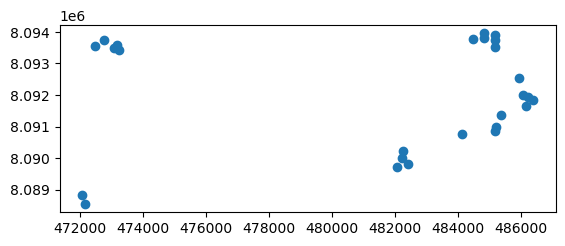

In [61]:
puntos_indi.plot()

In [62]:
# identifoca los lotes que se intersectan
gdf_lotes_cat = gpd.sjoin(gdf_cat, puntos_indi, how='inner', predicate='intersects')
# filtra los lotes intersectados en la capa original
poligonos_intersect_cat = gdf_cat.loc[gdf_cat.index.isin(gdf_lotes_cat.index)]
# copy
poligonos_intersect_cat = poligonos_intersect_cat.copy()
poligonos_intersect_cat = poligonos_intersect_cat[['unidad_01', 'unidad_02', 'unidad_03', 'unidad_04', 'unidad_05', 'area', 'soca', 'zona', 'geometry']]

In [63]:
# Cambiar el nombre de la columna 'old_name' a 'new_name'
poligonos_intersect_cat.rename(columns={'zona': 'inst'}, inplace=True)

In [64]:
poligonos_intersect_cat

,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,area,soca,inst,geometry
2943,2013.0,LA ASUNTA--CRONEMBOLD,2641.0,CRONENBOLD AGUILERA ROBERTO,L1.1,0.705651,0.0,50,"POLYGON ((473266.313 8093368.842, 473264.545 8..."
3228,2013.0,LA ASUNTA--CRONEMBOLD,2641.0,CRONENBOLD AGUILERA ROBERTO,L3,4.060608,0.0,50,"POLYGON ((473082.973 8093687.378, 473289.088 8..."
3420,2013.0,LA ASUNTA--CRONEMBOLD,2641.0,CRONENBOLD AGUILERA ROBERTO,L2,3.712091,1.0,50,"POLYGON ((473059.665 8093421.714, 472999.010 8..."
3829,218.0,DON QUIJOTE,388.0,AGROPECUARIA MARIANA S.R.L.,L4,16.320118,0.0,69,"POLYGON ((485265.142 8091615.875, 485376.880 8..."
4073,19.0,SANTA BARBARA,388.0,AGROPECUARIA MARIANA S.R.L.,L28.1,12.733106,3.0,69,"POLYGON ((482501.881 8089944.349, 482501.881 8..."
4074,19.0,SANTA BARBARA,18358.0,ROJAS AMELUNGE CARLOS,L28.2,4.041720,1.0,69,"POLYGON ((482501.881 8089944.349, 482501.914 8..."
4075,218.0,DON QUIJOTE,388.0,AGROPECUARIA MARIANA S.R.L.,L3.1,2.707784,4.0,69,"POLYGON ((484953.034 8090975.832, 484953.034 8..."
4076,218.0,DON QUIJOTE,388.0,AGROPECUARIA MARIANA S.R.L.,L3.2,15.531223,1.0,69,"POLYGON ((484951.678 8090976.550, 484951.678 8..."
9706,1892.0,SANTA ROSITA--SERRATE HUGO,12478.0,SERRATE COLAMARINO HUGO,L5,8.399706,0.0,40,"POLYGON ((472256.750 8088829.879, 471990.278 8..."
9780,218.0,DON QUIJOTE,18358.0,ROJAS AMELUNGE CARLOS,L9,32.409977,0.0,69,"POLYGON ((485576.705 8092277.515, 485871.818 8..."


In [65]:
# CAMBIAR NOMBRE DATOS DE UNIDAD_03 Y UNDIAD_04 DE LOTES SOLICITADOS A LO INDICADO EN LOS PUNTOS
# Iterar sobre cada punto y encontrar el polígono que intersecta
for idx, point in puntos_indi.iterrows():
    point_geom = point.geometry
    matching_polygons = poligonos_intersect_cat[poligonos_intersect_cat.intersects(point_geom)]
    
    # Actualizar los campos de los polígonos que intersectan con los valores del punto
    for poly_idx in matching_polygons.index:
        poligonos_intersect_cat.at[poly_idx, 'unidad_03'] = point['unidad_03']
        poligonos_intersect_cat.at[poly_idx, 'unidad_04'] = point['unidad_04']

In [66]:
poligonos_intersect_cat

,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,area,soca,inst,geometry
2943,2013.0,LA ASUNTA--CRONEMBOLD,2641.0,CRONENBOLD AGUILERA ROBERTO,L1.1,0.705651,0.0,50,"POLYGON ((473266.313 8093368.842, 473264.545 8..."
3228,2013.0,LA ASUNTA--CRONEMBOLD,2641.0,CRONENBOLD AGUILERA ROBERTO,L3,4.060608,0.0,50,"POLYGON ((473082.973 8093687.378, 473289.088 8..."
3420,2013.0,LA ASUNTA--CRONEMBOLD,2641.0,CRONENBOLD AGUILERA ROBERTO,L2,3.712091,1.0,50,"POLYGON ((473059.665 8093421.714, 472999.010 8..."
3829,218.0,DON QUIJOTE,388.0,AGROPECUARIA MARIANA S.R.L.,L4,16.320118,0.0,69,"POLYGON ((485265.142 8091615.875, 485376.880 8..."
4073,19.0,SANTA BARBARA,388.0,AGROPECUARIA MARIANA S.R.L.,L28.1,12.733106,3.0,69,"POLYGON ((482501.881 8089944.349, 482501.881 8..."
4074,19.0,SANTA BARBARA,388.0,AGROPECUARIA MARIANA S.R.L.,L28.2,4.041720,1.0,69,"POLYGON ((482501.881 8089944.349, 482501.914 8..."
4075,218.0,DON QUIJOTE,388.0,AGROPECUARIA MARIANA S.R.L.,L3.1,2.707784,4.0,69,"POLYGON ((484953.034 8090975.832, 484953.034 8..."
4076,218.0,DON QUIJOTE,388.0,AGROPECUARIA MARIANA S.R.L.,L3.2,15.531223,1.0,69,"POLYGON ((484951.678 8090976.550, 484951.678 8..."
9706,1892.0,SANTA ROSITA--SERRATE HUGO,12478.0,SERRATE COLAMARINO HUGO,L5,8.399706,0.0,40,"POLYGON ((472256.750 8088829.879, 471990.278 8..."
9780,218.0,DON QUIJOTE,388.0,AGROPECUARIA MARIANA S.R.L.,L9,32.409977,0.0,69,"POLYGON ((485576.705 8092277.515, 485871.818 8..."


In [67]:
# agrega los campos faltantes
poligonos_intersect_cat['os'] = ors

In [68]:
plan = poligonos_intersect_cat.copy()

In [69]:
plan

,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,area,soca,inst,geometry,os
2943,2013.0,LA ASUNTA--CRONEMBOLD,2641.0,CRONENBOLD AGUILERA ROBERTO,L1.1,0.705651,0.0,50,"POLYGON ((473266.313 8093368.842, 473264.545 8...",4
3228,2013.0,LA ASUNTA--CRONEMBOLD,2641.0,CRONENBOLD AGUILERA ROBERTO,L3,4.060608,0.0,50,"POLYGON ((473082.973 8093687.378, 473289.088 8...",4
3420,2013.0,LA ASUNTA--CRONEMBOLD,2641.0,CRONENBOLD AGUILERA ROBERTO,L2,3.712091,1.0,50,"POLYGON ((473059.665 8093421.714, 472999.010 8...",4
3829,218.0,DON QUIJOTE,388.0,AGROPECUARIA MARIANA S.R.L.,L4,16.320118,0.0,69,"POLYGON ((485265.142 8091615.875, 485376.880 8...",4
4073,19.0,SANTA BARBARA,388.0,AGROPECUARIA MARIANA S.R.L.,L28.1,12.733106,3.0,69,"POLYGON ((482501.881 8089944.349, 482501.881 8...",4
4074,19.0,SANTA BARBARA,388.0,AGROPECUARIA MARIANA S.R.L.,L28.2,4.041720,1.0,69,"POLYGON ((482501.881 8089944.349, 482501.914 8...",4
4075,218.0,DON QUIJOTE,388.0,AGROPECUARIA MARIANA S.R.L.,L3.1,2.707784,4.0,69,"POLYGON ((484953.034 8090975.832, 484953.034 8...",4
4076,218.0,DON QUIJOTE,388.0,AGROPECUARIA MARIANA S.R.L.,L3.2,15.531223,1.0,69,"POLYGON ((484951.678 8090976.550, 484951.678 8...",4
9706,1892.0,SANTA ROSITA--SERRATE HUGO,12478.0,SERRATE COLAMARINO HUGO,L5,8.399706,0.0,40,"POLYGON ((472256.750 8088829.879, 471990.278 8...",4
9780,218.0,DON QUIJOTE,388.0,AGROPECUARIA MARIANA S.R.L.,L9,32.409977,0.0,69,"POLYGON ((485576.705 8092277.515, 485871.818 8...",4


<Axes: >

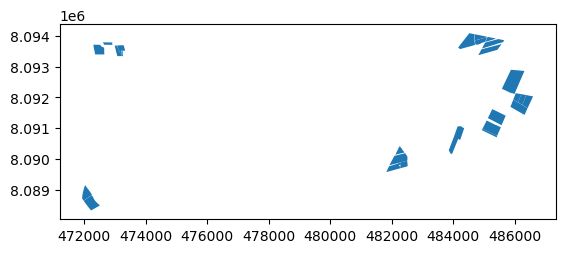

In [70]:
plan.plot()

In [71]:
plan['area'].sum()

229.4303674399928

In [72]:
#RECALCULAR EL AREA
plan['area'] = plan.geometry.area / 10000

In [73]:
plan['area'].sum()

229.4303674399928

In [74]:
# carga el shp de planificacion
gdf_plan = gpd.read_file(path_plan)

In [75]:
# determina el ultimo id
last_id = 0
if gdf_plan['id'].max() > 0:
    last_id = gdf_plan['id'].max()
else:
    last_id = 0

In [76]:
last_id

30

In [77]:
# Asignar valores incrementales a la columna 'id' empezando desde last_id + 1
plan['id'] = range(last_id + 1, last_id + 1 + len(plan))

In [78]:
plan

,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,area,soca,inst,geometry,os,id
2943,2013.0,LA ASUNTA--CRONEMBOLD,2641.0,CRONENBOLD AGUILERA ROBERTO,L1.1,0.705651,0.0,50,"POLYGON ((473266.313 8093368.842, 473264.545 8...",4,31
3228,2013.0,LA ASUNTA--CRONEMBOLD,2641.0,CRONENBOLD AGUILERA ROBERTO,L3,4.060608,0.0,50,"POLYGON ((473082.973 8093687.378, 473289.088 8...",4,32
3420,2013.0,LA ASUNTA--CRONEMBOLD,2641.0,CRONENBOLD AGUILERA ROBERTO,L2,3.712091,1.0,50,"POLYGON ((473059.665 8093421.714, 472999.010 8...",4,33
3829,218.0,DON QUIJOTE,388.0,AGROPECUARIA MARIANA S.R.L.,L4,16.320118,0.0,69,"POLYGON ((485265.142 8091615.875, 485376.880 8...",4,34
4073,19.0,SANTA BARBARA,388.0,AGROPECUARIA MARIANA S.R.L.,L28.1,12.733106,3.0,69,"POLYGON ((482501.881 8089944.349, 482501.881 8...",4,35
4074,19.0,SANTA BARBARA,388.0,AGROPECUARIA MARIANA S.R.L.,L28.2,4.041720,1.0,69,"POLYGON ((482501.881 8089944.349, 482501.914 8...",4,36
4075,218.0,DON QUIJOTE,388.0,AGROPECUARIA MARIANA S.R.L.,L3.1,2.707784,4.0,69,"POLYGON ((484953.034 8090975.832, 484953.034 8...",4,37
4076,218.0,DON QUIJOTE,388.0,AGROPECUARIA MARIANA S.R.L.,L3.2,15.531223,1.0,69,"POLYGON ((484951.678 8090976.550, 484951.678 8...",4,38
9706,1892.0,SANTA ROSITA--SERRATE HUGO,12478.0,SERRATE COLAMARINO HUGO,L5,8.399706,0.0,40,"POLYGON ((472256.750 8088829.879, 471990.278 8...",4,39
9780,218.0,DON QUIJOTE,388.0,AGROPECUARIA MARIANA S.R.L.,L9,32.409977,0.0,69,"POLYGON ((485576.705 8092277.515, 485871.818 8...",4,40


In [79]:
len(plan)

26

In [80]:
# union de los dos gdf
gdf_pla_gral = pd.concat([gdf_plan, plan], ignore_index=True)

In [81]:
gdf_pla_gral['area'].sum()

714.3660845379659

In [82]:
gdf_pla_gral['unidad_01'] = gdf_pla_gral['unidad_01'].astype(int)
gdf_pla_gral['unidad_03'] = gdf_pla_gral['unidad_03'].astype(int)
gdf_pla_gral['os'] = gdf_pla_gral['os'].astype(int)
gdf_pla_gral['soca'] = gdf_pla_gral['soca'].astype(int)
gdf_pla_gral['id'] = gdf_pla_gral['id'].astype(int)
gdf_pla_gral['inst'] = gdf_pla_gral['inst'].astype(int)

In [83]:
gdf_pla_gral

,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,area,os,soca,id,inst,idd,geometry
0,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,EP-L31,30.260942,1,2,1,50,1.0,"POLYGON ((504085.659 8094406.031, 503737.808 8..."
1,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,EP-L16,23.216246,1,4,2,50,1.0,"POLYGON ((504352.053 8094797.970, 504272.088 8..."
2,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,ER-L6,19.683505,1,5,3,50,1.0,"POLYGON ((503260.583 8094596.306, 503714.735 8..."
3,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,EP-L35,7.795719,1,4,4,50,1.0,"POLYGON ((504693.348 8094607.629, 504673.327 8..."
4,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,EP-L34,7.048921,1,5,5,50,1.0,"POLYGON ((504137.327 8094415.183, 504648.080 8..."
5,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,ER-L5,10.318332,1,5,6,50,1.0,"POLYGON ((502800.712 8094558.618, 502817.481 8..."
6,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,ER-L9,26.783587,1,3,7,50,1.0,"POLYGON ((502151.946 8095089.317, 502180.927 8..."
7,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,ER-L15,17.950658,1,2,8,50,1.0,"POLYGON ((501079.860 8094856.577, 501419.672 8..."
8,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,EP-L7,15.371285,1,2,9,50,1.0,"POLYGON ((501510.045 8095556.280, 501495.788 8..."
9,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,EP-L10,26.586339,1,2,10,50,1.0,"POLYGON ((502549.761 8095663.451, 503187.898 8..."


In [84]:
# exportar los datos en nuevo shp
gdf_pla_gral.to_file(path_plan)

# CARGAR PLANIFICACION A AMIGOCLOUD

In [85]:
def convertir_a_multipolygon(geometry):
    if isinstance(geometry, Polygon):
        return MultiPolygon([geometry])
    return geometry

def convertir_a_wkb(polygon):
    wkb_data = wkb.dumps(polygon, hex=True)
    return wkb_data

In [86]:
# repreyectar a WGS84
gdf_pla_gral = plan.to_crs(epsg=4326)
# convertir poligonos a multipoligonos
gdf_pla_gral['geometry'] = gdf_pla_gral['geometry'].apply(convertir_a_multipolygon)

In [87]:
gdf_pla_gral['unidad_01'] = gdf_pla_gral['unidad_01'].astype(int)
gdf_pla_gral['unidad_03'] = gdf_pla_gral['unidad_03'].astype(int)
gdf_pla_gral['os'] = gdf_pla_gral['os'].astype(int)
gdf_pla_gral['soca'] = gdf_pla_gral['soca'].astype(int)
gdf_pla_gral['id'] = gdf_pla_gral['id'].astype(int)
gdf_pla_gral['inst'] = gdf_pla_gral['inst'].astype(int)

In [88]:
len(gdf_pla_gral)

26

In [89]:
# recorrer el gdf de lotes y cargarlo a amigocloud
id_proyecto = f'https://app.amigocloud.com/api/v1/projects/35248/sql'
for index, row in gdf_pla_gral.iterrows():
    wkb_hex = convertir_a_wkb(row['geometry'])
    insert_sql = f"""
    INSERT INTO dataset_360912 (id, unidad_01, unidad_02, unidad_03, unidad_04, unidad_05, area, os, geometry)
    VALUES ({row['id']}, {row['unidad_01']}, '{row['unidad_02']}', {row['unidad_03']}, '{row['unidad_04']}', '{row['unidad_05']}', {row['area']}, '{row['os']}', ST_SetSRID(ST_GeomFromWKB('\\x{wkb_hex}'), 4326));
    """
    query_sql = {'query': insert_sql}
    resultado_post = amigocloud.post(id_proyecto, query_sql)

# CARGAR XLSX

In [90]:
from openpyxl import load_workbook
from openpyxl.utils.dataframe import dataframe_to_rows
from datetime import datetime

In [91]:
# Cargar el archivo Excel
sheet_name = 'DATA'
table_name = 'tbl_data'

In [92]:
excel_data = pd.read_excel(path_xlsx_parte)

In [93]:
gdf_pla_gral

,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,area,soca,inst,geometry,os,id
2943,2013,LA ASUNTA--CRONEMBOLD,2641,CRONENBOLD AGUILERA ROBERTO,L1.1,0.705651,0,50,"MULTIPOLYGON (((-63.25148 -17.24460, -63.25150...",4,31
3228,2013,LA ASUNTA--CRONEMBOLD,2641,CRONENBOLD AGUILERA ROBERTO,L3,4.060608,0,50,"MULTIPOLYGON (((-63.25320 -17.24171, -63.25126...",4,32
3420,2013,LA ASUNTA--CRONEMBOLD,2641,CRONENBOLD AGUILERA ROBERTO,L2,3.712091,1,50,"MULTIPOLYGON (((-63.25343 -17.24412, -63.25399...",4,33
3829,218,DON QUIJOTE,388,AGROPECUARIA MARIANA S.R.L.,L4,16.320118,0,69,"MULTIPOLYGON (((-63.13862 -17.26055, -63.13757...",4,34
4073,19,SANTA BARBARA,388,AGROPECUARIA MARIANA S.R.L.,L28.1,12.733106,3,69,"MULTIPOLYGON (((-63.16463 -17.27564, -63.16463...",4,35
4074,19,SANTA BARBARA,388,AGROPECUARIA MARIANA S.R.L.,L28.2,4.041720,1,69,"MULTIPOLYGON (((-63.16463 -17.27564, -63.16463...",4,36
4075,218,DON QUIJOTE,388,AGROPECUARIA MARIANA S.R.L.,L3.1,2.707784,4,69,"MULTIPOLYGON (((-63.14156 -17.26633, -63.14156...",4,37
4076,218,DON QUIJOTE,388,AGROPECUARIA MARIANA S.R.L.,L3.2,15.531223,1,69,"MULTIPOLYGON (((-63.14158 -17.26633, -63.14158...",4,38
9706,1892,SANTA ROSITA--SERRATE HUGO,12478,SERRATE COLAMARINO HUGO,L5,8.399706,0,40,"MULTIPOLYGON (((-63.26104 -17.28561, -63.26355...",4,39
9780,218,DON QUIJOTE,388,AGROPECUARIA MARIANA S.R.L.,L9,32.409977,0,69,"MULTIPOLYGON (((-63.13569 -17.25457, -63.13291...",4,40


In [94]:
new_data = {
    'INSTITUCION':list(gdf_pla_gral['inst']), 
    'COD CANERO': list(gdf_pla_gral['unidad_03']),
    'NOMBRE CANERO': list(gdf_pla_gral['unidad_04']),
    'COD PROPIEDAD': list(gdf_pla_gral['unidad_01']),
    'NOMBRE PROPIEDAD': list(gdf_pla_gral['unidad_02']),
    'LOTE': list(gdf_pla_gral['unidad_05']),
    'HECTAREA': list(gdf_pla_gral['area']),
    'CICLO': list(gdf_pla_gral['soca']),
    'ID': list(gdf_pla_gral['id']),
    'OS': list(gdf_pla_gral['os'])
}

new_df = pd.DataFrame(new_data)

In [95]:
new_df

,INSTITUCION,COD CANERO,NOMBRE CANERO,COD PROPIEDAD,NOMBRE PROPIEDAD,LOTE,HECTAREA,CICLO,ID,OS
0,50,2641,CRONENBOLD AGUILERA ROBERTO,2013,LA ASUNTA--CRONEMBOLD,L1.1,0.705651,0,31,4
1,50,2641,CRONENBOLD AGUILERA ROBERTO,2013,LA ASUNTA--CRONEMBOLD,L3,4.060608,0,32,4
2,50,2641,CRONENBOLD AGUILERA ROBERTO,2013,LA ASUNTA--CRONEMBOLD,L2,3.712091,1,33,4
3,69,388,AGROPECUARIA MARIANA S.R.L.,218,DON QUIJOTE,L4,16.320118,0,34,4
4,69,388,AGROPECUARIA MARIANA S.R.L.,19,SANTA BARBARA,L28.1,12.733106,3,35,4
5,69,388,AGROPECUARIA MARIANA S.R.L.,19,SANTA BARBARA,L28.2,4.041720,1,36,4
6,69,388,AGROPECUARIA MARIANA S.R.L.,218,DON QUIJOTE,L3.1,2.707784,4,37,4
7,69,388,AGROPECUARIA MARIANA S.R.L.,218,DON QUIJOTE,L3.2,15.531223,1,38,4
8,40,12478,SERRATE COLAMARINO HUGO,1892,SANTA ROSITA--SERRATE HUGO,L5,8.399706,0,39,4
9,69,388,AGROPECUARIA MARIANA S.R.L.,218,DON QUIJOTE,L9,32.409977,0,40,4


In [96]:
new_df['MEZCLA'] = 0
new_df['LABOR_REALIZADA'] = 'PUL. CON DRONE'
new_df['Nº DE LABOR'] = 'PA-2025-1'

In [97]:
new_df

,INSTITUCION,COD CANERO,NOMBRE CANERO,COD PROPIEDAD,NOMBRE PROPIEDAD,LOTE,HECTAREA,CICLO,ID,OS,MEZCLA,LABOR_REALIZADA,Nº DE LABOR
0,50,2641,CRONENBOLD AGUILERA ROBERTO,2013,LA ASUNTA--CRONEMBOLD,L1.1,0.705651,0,31,4,0,PUL. CON DRONE,PA-2025-1
1,50,2641,CRONENBOLD AGUILERA ROBERTO,2013,LA ASUNTA--CRONEMBOLD,L3,4.060608,0,32,4,0,PUL. CON DRONE,PA-2025-1
2,50,2641,CRONENBOLD AGUILERA ROBERTO,2013,LA ASUNTA--CRONEMBOLD,L2,3.712091,1,33,4,0,PUL. CON DRONE,PA-2025-1
3,69,388,AGROPECUARIA MARIANA S.R.L.,218,DON QUIJOTE,L4,16.320118,0,34,4,0,PUL. CON DRONE,PA-2025-1
4,69,388,AGROPECUARIA MARIANA S.R.L.,19,SANTA BARBARA,L28.1,12.733106,3,35,4,0,PUL. CON DRONE,PA-2025-1
5,69,388,AGROPECUARIA MARIANA S.R.L.,19,SANTA BARBARA,L28.2,4.041720,1,36,4,0,PUL. CON DRONE,PA-2025-1
6,69,388,AGROPECUARIA MARIANA S.R.L.,218,DON QUIJOTE,L3.1,2.707784,4,37,4,0,PUL. CON DRONE,PA-2025-1
7,69,388,AGROPECUARIA MARIANA S.R.L.,218,DON QUIJOTE,L3.2,15.531223,1,38,4,0,PUL. CON DRONE,PA-2025-1
8,40,12478,SERRATE COLAMARINO HUGO,1892,SANTA ROSITA--SERRATE HUGO,L5,8.399706,0,39,4,0,PUL. CON DRONE,PA-2025-1
9,69,388,AGROPECUARIA MARIANA S.R.L.,218,DON QUIJOTE,L9,32.409977,0,40,4,0,PUL. CON DRONE,PA-2025-1


In [98]:
final_data = pd.concat([excel_data, new_df], ignore_index=True)

In [99]:
final_data.to_excel(path_xlsx_parte, index=False)